<h1>Integrating Socioeconomic and Medical Variables to Forecast Life Expectancy</h1>

**The Null Hypothesis (H₀):**

All regression coefficients = 0
(The features do not explain life expectancy)

<br>

**The Alternative Hypothesis (H₁):**

At least one coefficient ≠ 0
(Some features do help predict life expectancy)

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import scipy.stats as stats


In [3]:
data = pd.read_csv('life_expectancy_data.csv')

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2000,Developing,54.8,321,88,0.01,10.424960,62.0,6532,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
1,Afghanistan,2001,Developing,55.3,316,88,0.01,10.574728,63.0,8762,...,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
2,Afghanistan,2002,Developing,56.2,3,88,0.01,16.887351,64.0,2486,...,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
3,Afghanistan,2003,Developing,56.7,295,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
4,Afghanistan,2004,Developing,57.0,293,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8


In [5]:
data.columns = data.columns.str.strip()

In [6]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


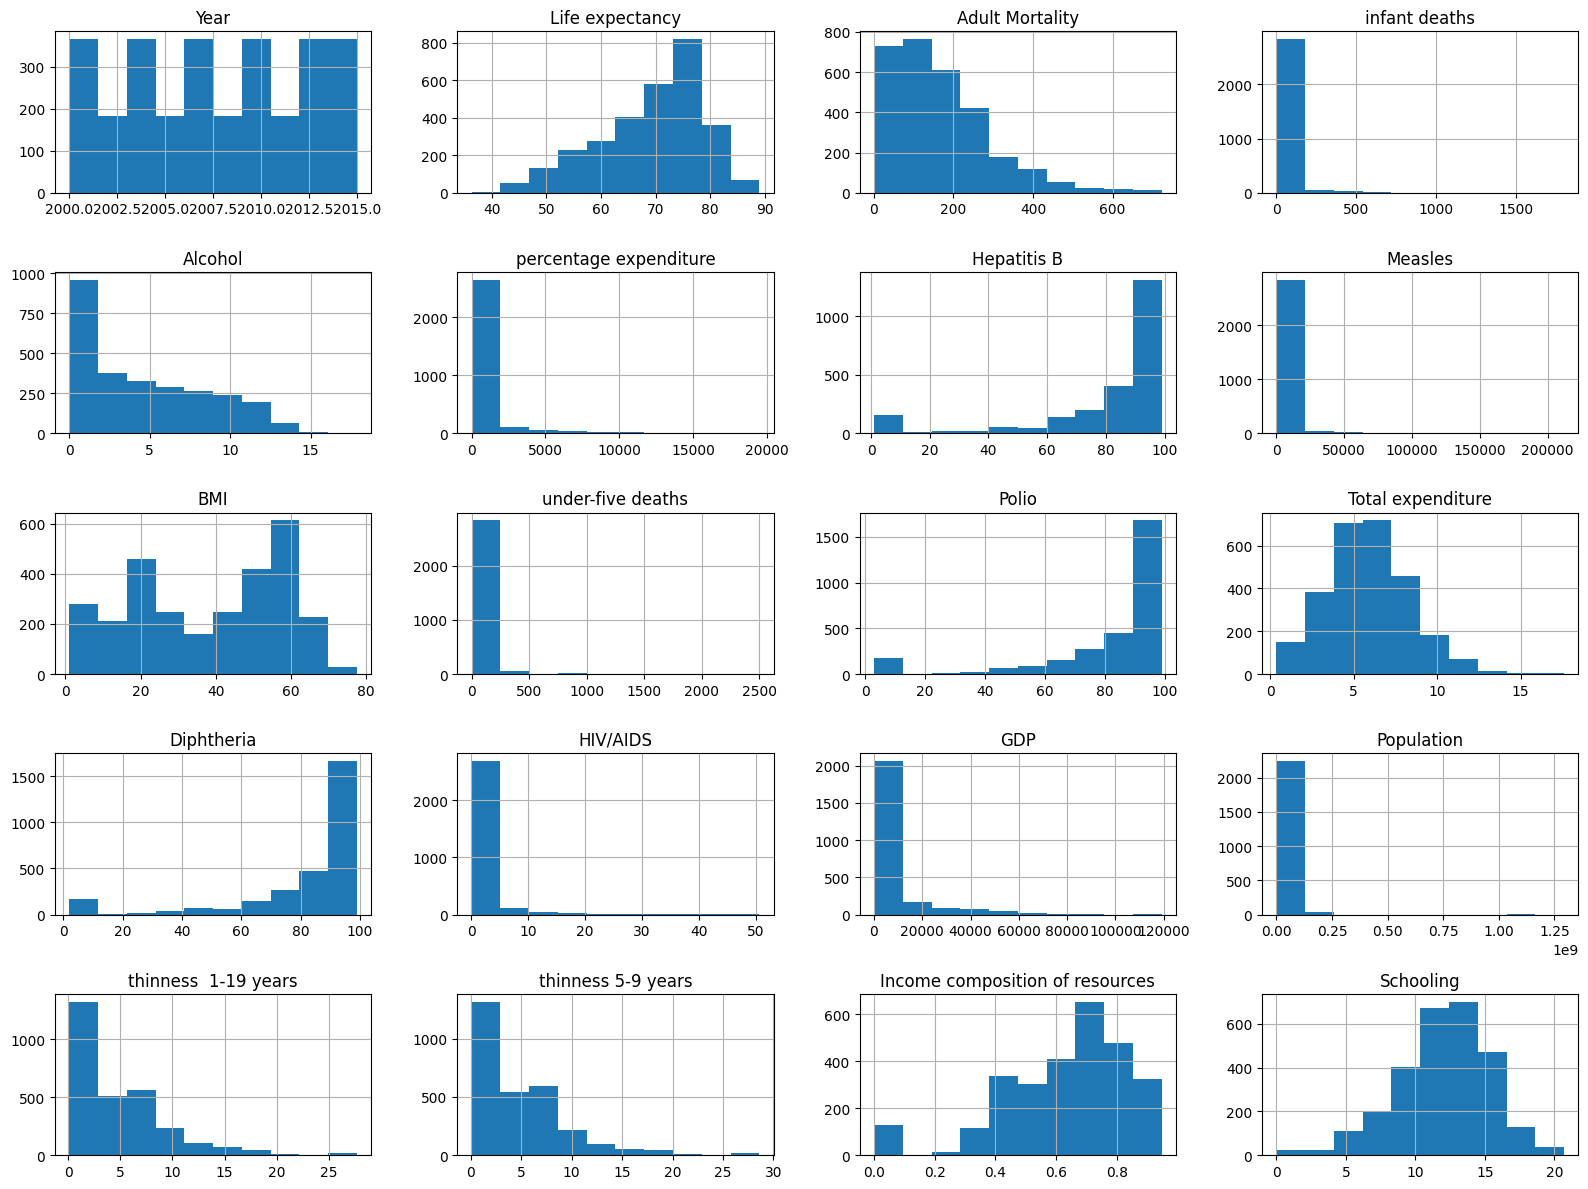

In [7]:
data.hist(figsize=(16, 12))
plt.tight_layout()
plt.show()

In [8]:
features = data.drop(['Life expectancy'], axis = 1)
target = data['Life expectancy']

In [9]:
numeric_cols = features.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
  IQR = features[col].quantile(0.75) - features[col].quantile(0.25)
  LowerBound = features[col].quantile(0.25) - (IQR * 1.5)
  UpperBound = features[col].quantile(0.75) + (IQR * 1.5)
  features.loc[(features[col] < LowerBound) | (features[col] > UpperBound), col] = np.nan

In [10]:
missing_values = features.isnull().sum()
print(missing_values[missing_values > 0])

Adult Mortality                     82
infant deaths                      315
Alcohol                            193
percentage expenditure             388
Hepatitis B                        805
Measles                            542
BMI                                 32
under-five deaths                  394
Polio                              297
Total expenditure                  256
Diphtheria                         316
HIV/AIDS                           542
GDP                                806
Population                         938
thinness  1-19 years               121
thinness 5-9 years                 129
Income composition of resources    290
Schooling                          202
dtype: int64


In [11]:
def fillna_grouped(df, column, method='mean'):
    def fill(x):
        if method == 'mean':
            val = x.mean()
        elif method == 'median':
            val = x.median()
        else:
            raise ValueError("Unsupported method")
        if np.isnan(val):
            val = df[column].mean() if method == 'mean' else df[column].median()
        return x.fillna(val)

    return df.groupby('Country')[column].transform(fill)

fill_strategies = {
    'Alcohol': 'mean',
    'Hepatitis B': 'median',
    'BMI': 'mean',
    'Polio': 'median',
    'Total expenditure': 'mean',
    'Diphtheria': 'mean',
    'thinness  1-19 years': 'mean',
    'thinness 5-9 years': 'mean',
    'Income composition of resources': 'median',
    'Schooling': 'mean',
    'Adult Mortality': 'median',
    'infant deaths': 'median',
    'percentage expenditure': 'median',
    'Measles': 'median',
    'under-five deaths': 'median',
    'HIV/AIDS': 'median'
}

for col, method in fill_strategies.items():
    features[col] = fillna_grouped(features, col, method=method)

features.sort_values(['Country', 'Year'], inplace=True)
features['GDP'] = features.groupby('Country')['GDP'].transform(lambda x: x.interpolate(method='linear'))
features['Population'] = features.groupby('Country')['Population'].transform(lambda x: x.interpolate(method='linear'))

features['GDP'] = features.groupby('Country')['GDP'].transform(lambda x: x.fillna(x.mean()))
features['Population'] = features.groupby('Country')['Population'].transform(lambda x: x.fillna(x.mean()))

features['GDP'].fillna(features['GDP'].mean(), inplace=True)
features['Population'].fillna(features['Population'].mean(), inplace=True)


<ipython-input-11-5ed5b057324d>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['GDP'].fillna(features['GDP'].mean(), inplace=True)
<ipython-input-11-5ed5b057324d>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [12]:
missing_values = features.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [13]:
features.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,157.639686,9.238388,4.612124,183.861468,87.460724,100.672814,38.235394,10.404713,87.928279,5.827710,88.102333,0.268067,2731.304000,3.041198e+06,4.426554,4.374572,0.657458,12.103680
std,4.61056,109.243923,14.482145,4.026333,246.809125,11.963131,178.517852,19.850184,17.111608,12.126940,2.267243,11.571163,0.370317,2786.824413,3.655694e+06,3.569815,3.490147,0.157382,3.058013
min,2000.00000,1.000000,0.000000,0.010000,0.000000,47.000000,0.000000,1.000000,0.000000,51.000000,0.370000,51.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.253000,3.800000
25%,2003.75000,73.000000,0.000000,0.950000,4.853964,82.000000,0.000000,19.400000,0.000000,82.500000,4.280000,82.000000,0.100000,544.433760,3.839568e+05,1.600000,1.600000,0.538000,10.300000
50%,2007.50000,142.000000,2.000000,3.790000,63.817453,93.000000,10.000000,43.000000,2.000000,93.000000,5.780000,93.000000,0.100000,2282.501795,2.441466e+06,3.300000,3.300000,0.686500,12.200000
75%,2011.25000,225.000000,11.000000,7.680000,267.051312,96.000000,114.250000,56.100000,11.000000,97.000000,7.382500,97.000000,0.200000,3688.539523,3.041198e+06,6.800000,6.800000,0.774000,14.150000
max,2015.00000,459.000000,55.000000,17.870000,1099.248837,99.000000,899.000000,77.600000,70.000000,99.000000,12.250000,99.000000,1.800000,14125.961000,1.789956e+07,15.400000,15.600000,0.948000,20.600000


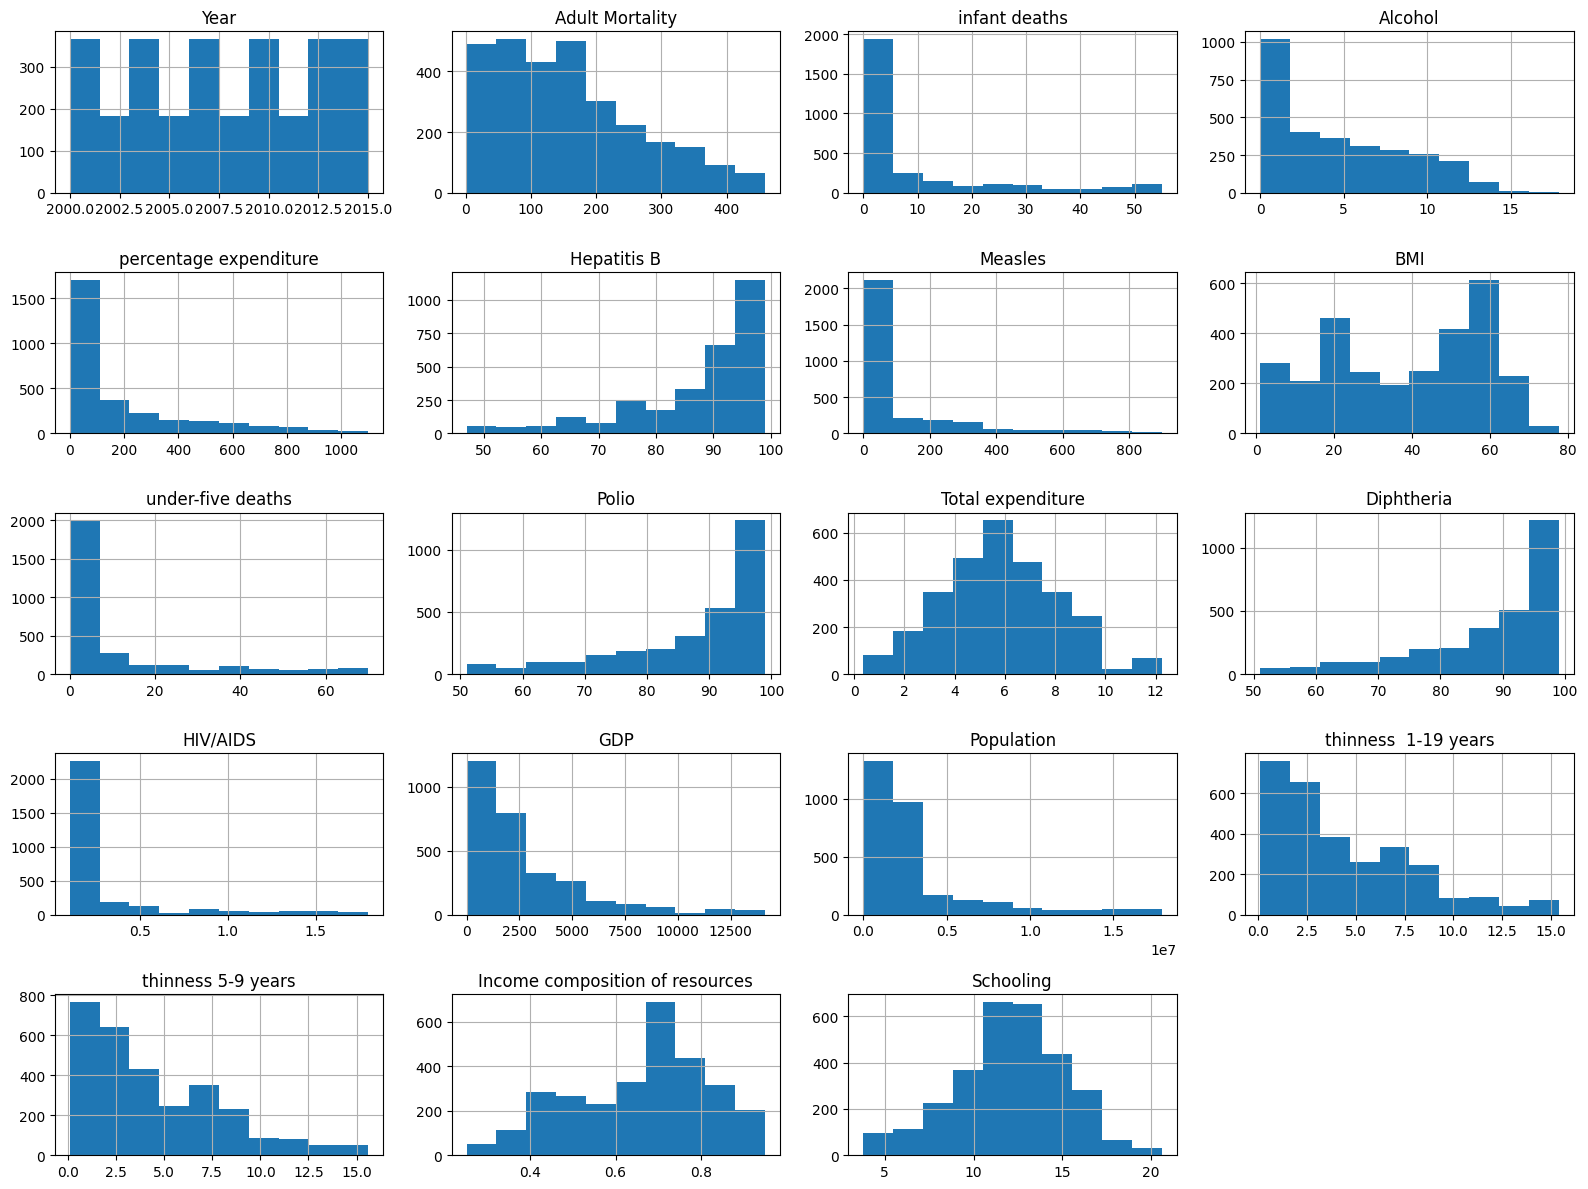

In [14]:
features.hist(figsize=(16, 12))
plt.tight_layout()
plt.show()

In [15]:
features = features.drop(['Country','Year'], axis = 1)

In [16]:
categorical_cols = features.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
  features[col] = label_encoder.fit_transform(features[col])

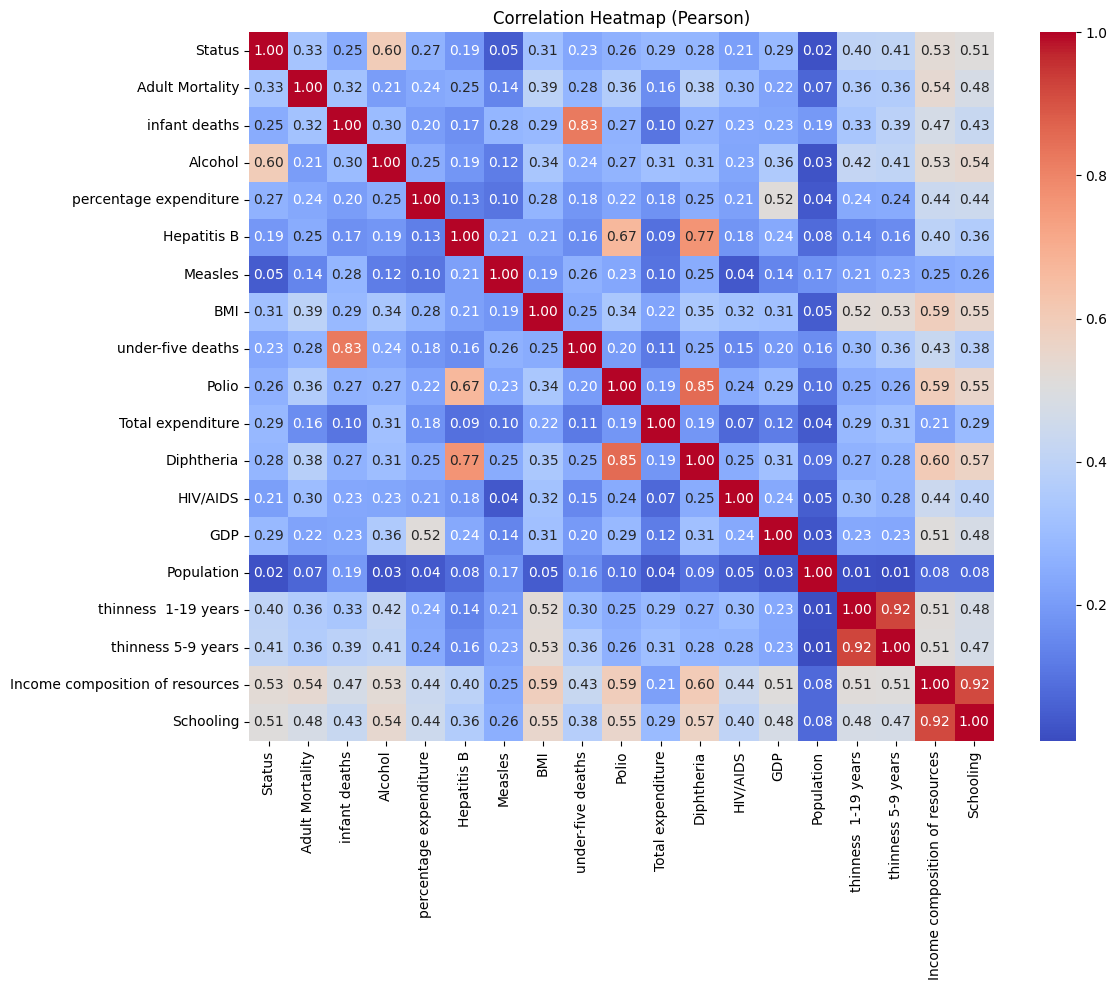

In [17]:
corr_matrix = features.corr(method='pearson').abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Pearson)')
plt.tight_layout()
plt.show()


In [18]:
features['infant_under5_avg'] = (features['infant deaths'] + features['under-five deaths']) / 2
features.drop(columns=['infant deaths', 'under-five deaths'], inplace=True)

features['Polio_Hepatitis B_Diphtheria'] = (features['Polio'] + features['Hepatitis B'] + features['Diphtheria']) / 3
features.drop(columns=['Polio', 'Hepatitis B', 'Diphtheria'], inplace=True)

features['Thinness'] = (features['thinness  1-19 years'] + features['thinness 5-9 years']) / 2
features.drop(columns=['thinness  1-19 years', 'thinness 5-9 years'], inplace=True)

features['Income_Schooling'] = (features['Income composition of resources'] + features['Schooling']) / 2
features.drop(columns=['Income composition of resources', 'Schooling'], inplace=True)

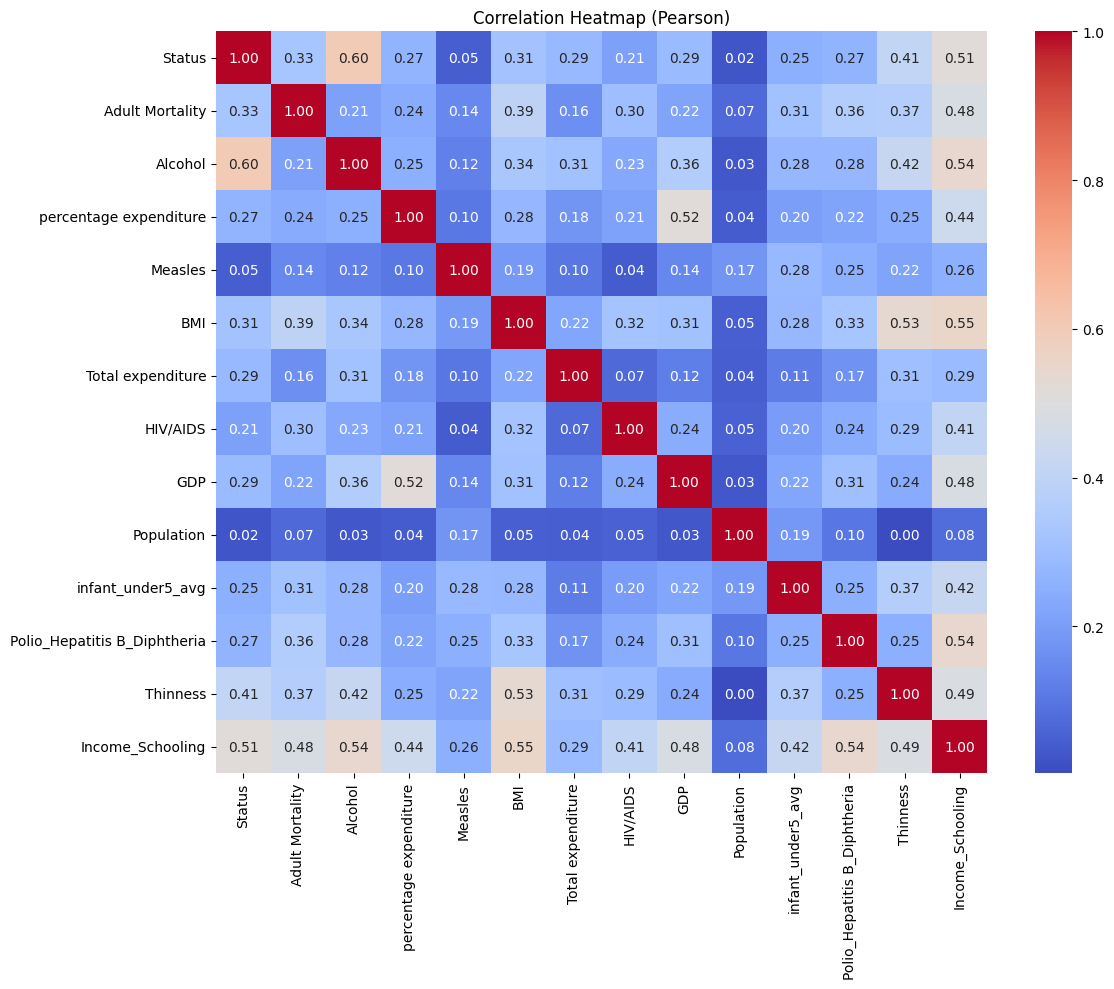

In [19]:
corr_matrix = features.corr(method='pearson').abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Pearson)')
plt.tight_layout()
plt.show()

In [20]:
X_train, X_test,  Y_train, Y_test = train_test_split(features, target, test_size=0.1, random_state=42)

In [21]:
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
X_train_ols = sm.add_constant(X_train)
ols_model = sm.OLS(Y_train, X_train_ols).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     260.9
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:40:42   Log-Likelihood:                -8524.4
No. Observations:                2635   AIC:                         1.708e+04
Df Residuals:                    2620   BIC:                         1.717e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**Conclusion**

We reject the null hypothesis, as the Prob (F-statistic) is below 0.05, and conclude that at least one feature does significantly predict life expectancy

In [22]:
y_pred = ols_model.predict(sm.add_constant(X_test))
r2 = r2_score(Y_test, y_pred)
print(f"R-squared: {r2}")
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.5178710392176024
Mean Squared Error: 44.17273951473371


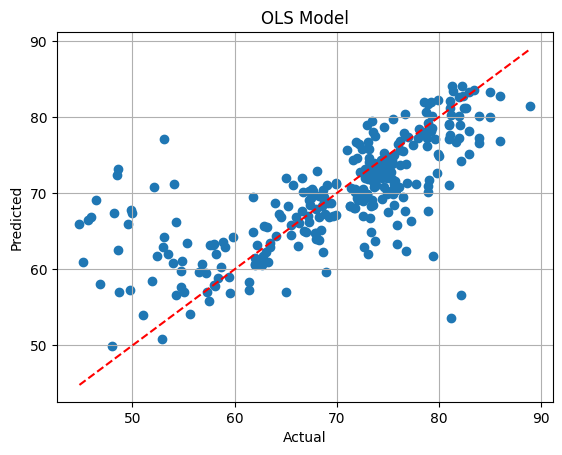

In [23]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("OLS Model")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.grid(True)

In [24]:
#X_train = X_train.drop('Measles', axis = 1)
#X_test = X_test.drop('Measles', axis = 1)
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(f"R-squared: {r2}")
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.5178710392150083
Mean Squared Error: 44.17273951497138


In [25]:
#X_train = X_train.drop('Measles', axis = 1)
#X_test = X_test.drop('Measles', axis = 1)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2 = r2_score(Y_test, y_pred_lasso)
print(f"R-squared: {r2}")
mse = mean_squared_error(Y_test, y_pred_lasso)
print(f"Mean Squared Error: {mse}")

R-squared: 0.46128495980020556
Mean Squared Error: 49.3571659847977


In [26]:
#X_train = X_train.drop('Measles', axis = 1)
#X_test = X_test.drop('Measles', axis = 1)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2 = r2_score(Y_test, y_pred_ridge)
print(f"R-squared: {r2}")
mse = mean_squared_error(Y_test, y_pred_ridge)
print(f"Mean Squared Error: {mse}")

R-squared: 0.5178153262200845
Mean Squared Error: 44.1778439492878


In [27]:
X_train = X_train.drop('Measles', axis = 1)
X_test = X_test.drop('Measles', axis = 1)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, Y_train)
y_pred_rf = random_forest_model.predict(X_test)
r2 = r2_score(Y_test, y_pred_rf)
print(f"R-squared: {r2}")
mse = mean_squared_error(Y_test, y_pred_rf)
print(f"Mean Squared Error: {mse}")

R-squared: 0.8812176011133004
Mean Squared Error: 10.882864112627983


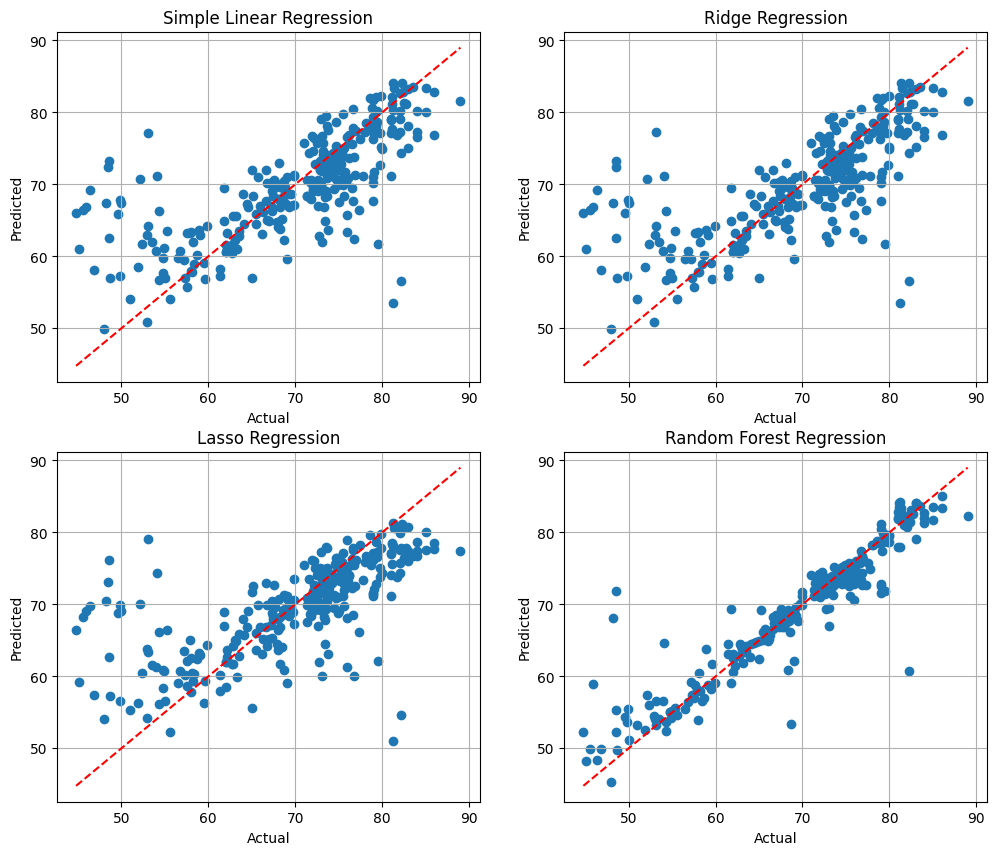

In [28]:
fig, axes = plt.subplots(2,2, figsize=(12, 10))

axes[0,0].scatter(Y_test, y_pred)
axes[0,0].set_xlabel("Actual")
axes[0,0].set_ylabel("Predicted")
axes[0,0].set_title("Simple Linear Regression")
axes[0,0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
axes[0,0].grid(True)

axes[0,1].scatter(Y_test, y_pred_ridge)
axes[0,1].set_xlabel("Actual")
axes[0,1].set_ylabel("Predicted")
axes[0,1].set_title("Ridge Regression")
axes[0,1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
axes[0,1].grid(True)

axes[1,0].scatter(Y_test, y_pred_lasso)
axes[1,0].set_xlabel("Actual")
axes[1,0].set_ylabel("Predicted")
axes[1,0].set_title("Lasso Regression")
axes[1,0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
axes[1,0].grid(True)

axes[1,1].scatter(Y_test, y_pred_rf)
axes[1,1].set_xlabel("Actual")
axes[1,1].set_ylabel("Predicted")
axes[1,1].set_title("Random Forest Regression")
axes[1,1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
axes[1,1].grid(True)